<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [16]:
# Your Code Here
data = pd.read_csv('titanium.csv')

In [17]:
x = data['x'].values
y = data['y'].values

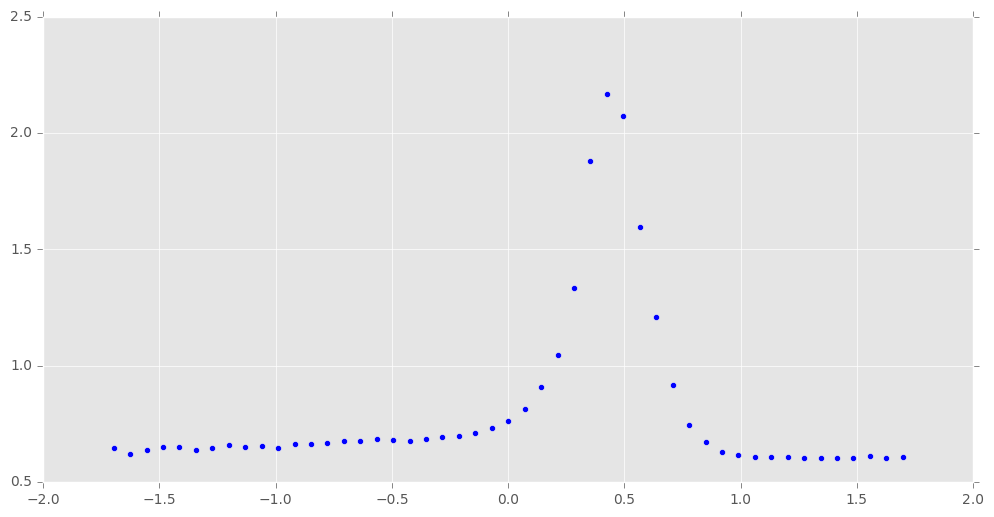

In [18]:
X = (x - x.mean()) / x.std()
plt.figure()
plt.scatter(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

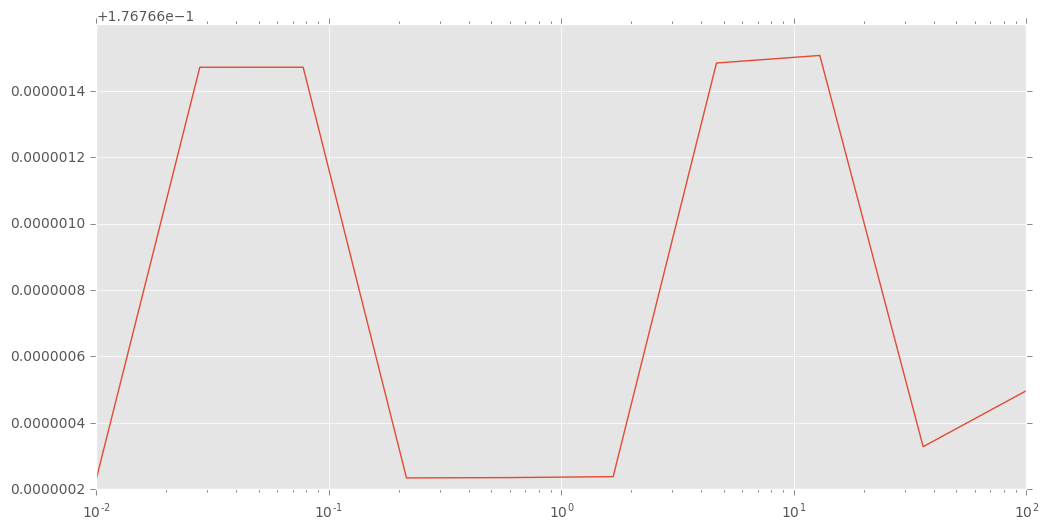

In [50]:
from sklearn.metrics import mean_absolute_error

X = X.reshape(49, -1)
K = np.logspace(-2, 2, 10)

err_lin = []
for i in K:
    clf = SVR(kernel = 'linear', degree = 1,  C = i, epsilon = 0.01)
    clf.fit(X, y)
    
    err_lin.append(mean_absolute_error(clf.predict(X), y))

plt.figure()
plt.semilogx(K, np.array(err_lin))

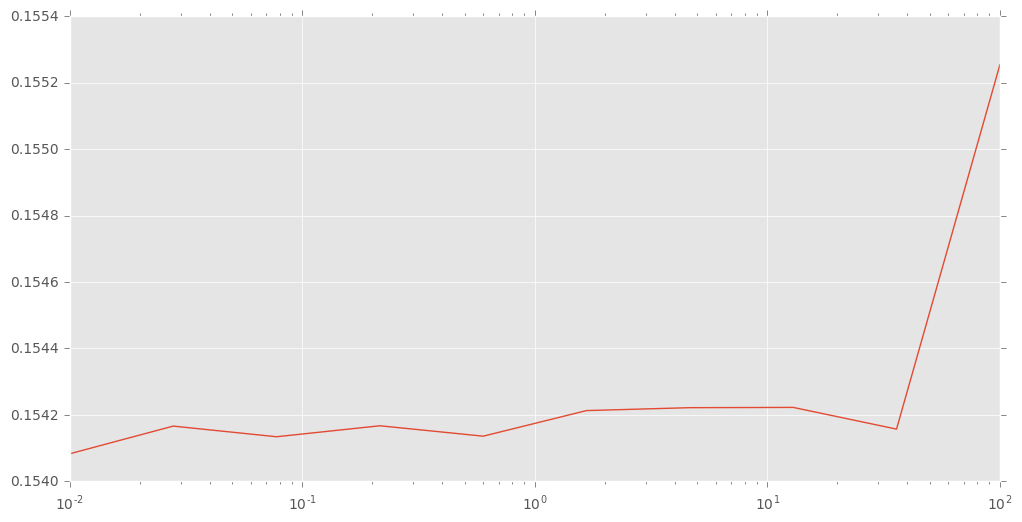

In [45]:
err_pol = []
for i in K:
    clf = SVR(kernel = 'poly', C = i, degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01)
    clf.fit(X, y)
    
    err_pol.append(mean_absolute_error(clf.predict(X), y))

plt.figure()
plt.semilogx(K, np.array(err_pol))

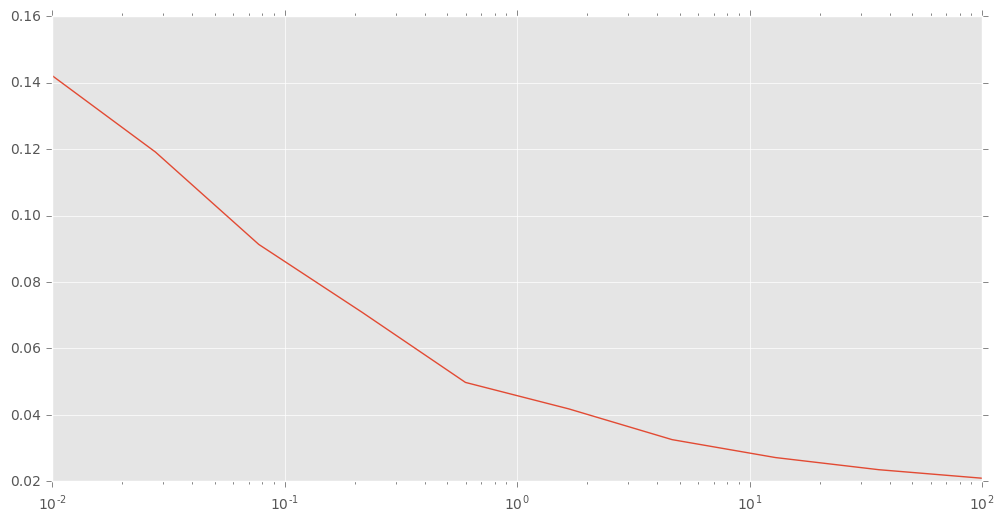

In [52]:
err_rbf = []
for i in K:
    clf = SVR(kernel = 'rbf', C = i, gamma = 6, coef0 = 1, epsilon = 0.01)
    clf.fit(X, y)
    
    err_rbf.append(mean_absolute_error(clf.predict(X), y))

plt.figure()
plt.semilogx(K, np.array(err_rbf))

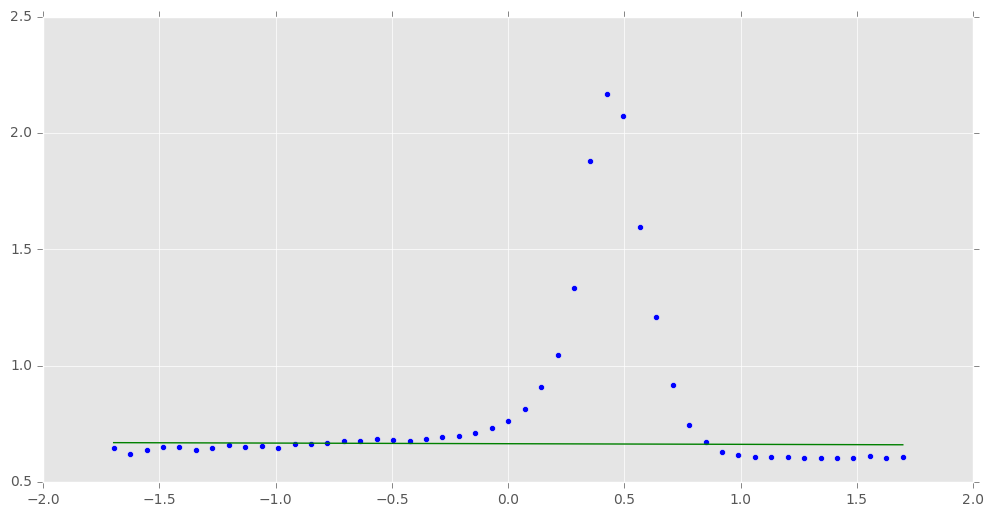

In [49]:
clf_ = SVR(kernel='linear', degree=1, C=1, epsilon=0.01)
clf_.fit(X, y)

plt.scatter(X, y)
plt.plot(X, clf_.predict(X), color='g')

#неодообучились

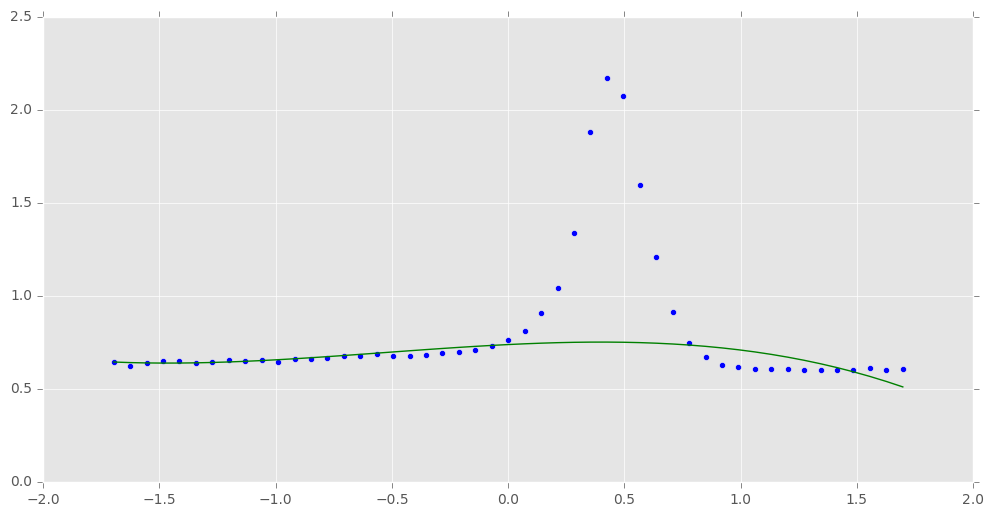

In [62]:
clf_ = SVR(kernel = 'poly', C = 0.01, degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01)
clf_.fit(X, y)

plt.scatter(X, y)
plt.plot(X, clf_.predict(X), color='g')

#наиболее приемлимый результат, но возможно стоит изменить параметр degree

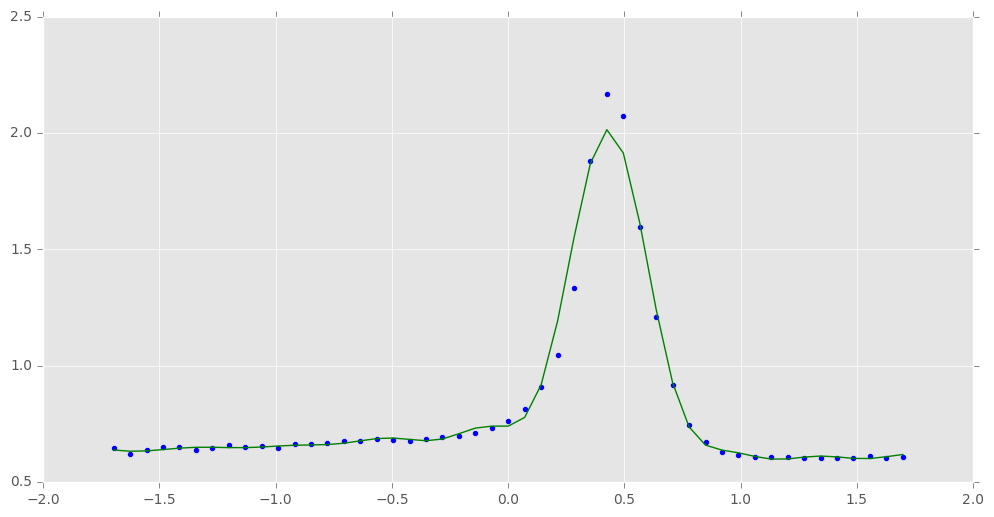

In [54]:
clf_ = SVR(kernel='rbf', gamma = 6, coef0 = 100, C=50, epsilon=0.01)
clf_.fit(X, y)

plt.scatter(X, y)
plt.plot(X, clf_.predict(X), color='g')
#здесь переобучение

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [64]:
## Your Code Here
eng = pd.read_csv('war_and_peace_en.txt', header = None)
esp = pd.read_csv('war_and_peace_es.txt' ,header = None)
eng['label'] = 1
esp['label'] = 0

In [65]:
df = eng.append(esp)
df['word'] = df[0]

df = df.drop([0], axis=1)
df.head()

,label,word
0,1,war
1,1,and
2,1,peace
3,1,leo
4,1,tolstoy


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [66]:
from sklearn.model_selection import train_test_split

RND_SEED = 254
np.random.seed(RND_SEED)

df = df.iloc[np.random.permutation(df.shape[0])]
df = df.reset_index().drop('index', axis=1).iloc[0:1500]
df = df.reset_index()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df['index'], df['label'], test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [69]:
def leven(string_1, string_2, len_1=None, len_2=None, offset_1=0, offset_2=0, memo=None):
    """
    Calculates the Levenshtein distance between two strings.
    Usage::
        >>> recursive_levenshtein('kitten', 'sitting')
        3
        >>> recursive_levenshtein('kitten', 'kitten')
        0
        >>> recursive_levenshtein('', '')
        0
    """
    if len_1 is None:
        len_1 = len(string_1)

    if len_2 is None:
        len_2 = len(string_2)

    if memo is None:
        memo = {}

    key = ','.join([str(offset_1), str(len_1), str(offset_2), str(len_2)])

    if memo.get(key) is not None:
        return memo[key]

    if len_1 == 0:
        return len_2
    elif len_2 == 0:
        return len_1

    cost = 0

    if string_1[offset_1] != string_2[offset_2]:
        cost = 1

    dist = min(
        leven(string_1, string_2, len_1 - 1, len_2, offset_1 + 1, offset_2, memo) + 1,
        leven(string_1, string_2, len_1, len_2 - 1, offset_1, offset_2 + 1, memo) + 1,
        leven(string_1, string_2, len_1 - 1, len_2 - 1, offset_1 + 1, offset_2 + 1, memo) + cost,
    )
    memo[key] = dist
    return dist


In [70]:
def string_kernel(U, V):
    U_index = U[:,0]
    V_index = V[:,0]
    
    return [[np.exp(-leven(u, v) ** 2) for u in df.loc[U_index]['word']] for v in df.loc[V_index]['word']]

In [71]:
G = string_kernel(X_train.reshape(-1,1), X_train.reshape(-1,1))

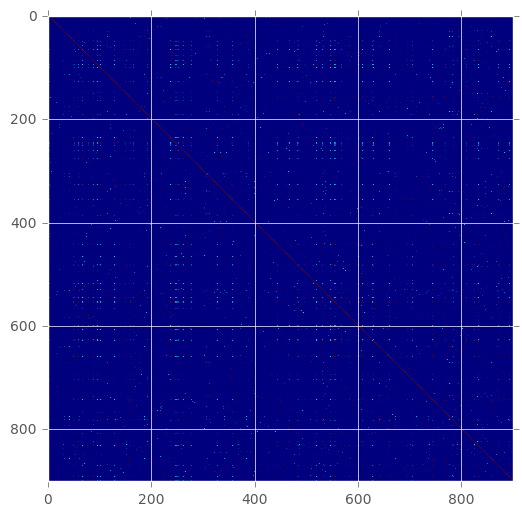

In [72]:
plt.imshow(G)

In [73]:
from sklearn.metrics import accuracy_score
G1 = string_kernel(X_train.reshape(-1,1), X_test.reshape(-1,1))

In [74]:
Lis = [0.1, 0.2, 0.4, 0.6, 0.7, 1, 1.2, 1.4, 1.6, 2, 2.6]

for i in Lis:
    clf = SVC(kernel='precomputed', C = i)
    clf.fit(G, y_train)
    print (accuracy_score(y_train, clf.predict(G)), i)

#выбираем 1.2

(0.63888888888888884, 0.1)
(0.67777777777777781, 0.2)
(0.77555555555555555, 0.4)
(0.98222222222222222, 0.6)
(0.98999999999999999, 0.7)
(0.99111111111111116, 1)
(0.99222222222222223, 1.2)
(0.99222222222222223, 1.4)
(0.99222222222222223, 1.6)
(0.99222222222222223, 2)
(0.99222222222222223, 2.6)


In [77]:
clf = SVC(kernel='precomputed', C=1.2)
clf.fit(G, y_train)


SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
print (accuracy_score(y_train, clf.predict(G)))
print (accuracy_score(y_test, clf.predict(G1)))

0.992222222222
0.803333333333


In [ ]:
#точность 0.80 на тестовой выборке) Это точно успех!))